In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

## Step 1 : Split the dataset

In [3]:
df = pd.read_csv('Real_estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
x = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores']]
y = df['Y house price of unit area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
X_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
294,2013.500,26.4,335.52730,6
96,2013.417,6.4,90.45606,9
377,2013.333,3.9,49.66105,8
89,2013.500,23.0,3947.94500,0
233,2013.333,39.7,333.36790,9


In [8]:
X_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
356,2012.833,10.3,211.4473,1
170,2013.333,24.0,4527.6870,0
224,2013.333,34.5,324.9419,6
331,2013.333,25.6,4519.6900,0
306,2013.500,14.4,169.9803,1


In [9]:
y_train.head()

294    38.1
96     59.5
377    56.8
89     25.3
233    32.4
Name: Y house price of unit area, dtype: float64

In [10]:
y_test.head()

356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
Name: Y house price of unit area, dtype: float64

## Step 2 : Checking correlation and visualizing heatmap

In [22]:
df = df.drop(columns=['No'])
corr_matrix = df.corr()

In [23]:
corr_matrix.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307


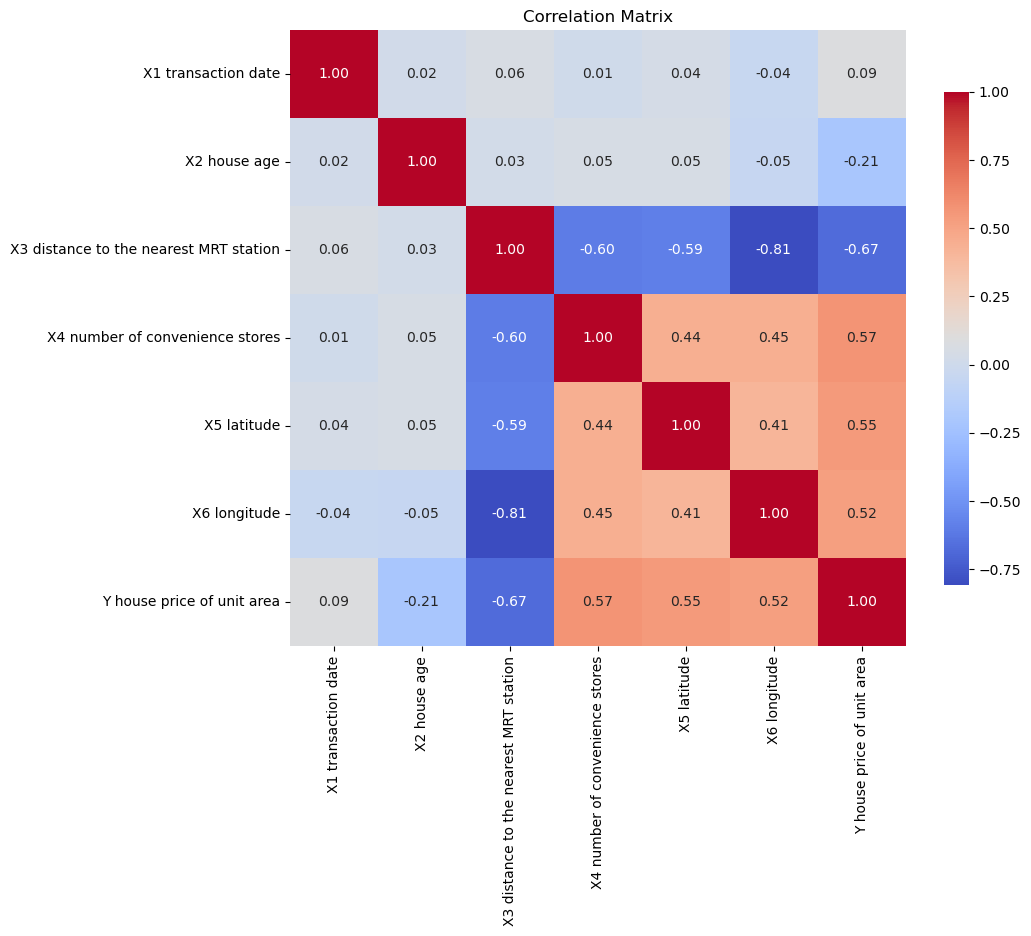

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Applying Regression Models 

### a. Linear Regression

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)


In [34]:
y_predict = linear.predict(X_test)
y_predict

array([39.98981277, 13.52646484, 41.68691715, 13.1577953 , 43.22756684,
       40.90816801, 42.84764719, 34.04697783, 49.79785588, 45.18907207,
       48.219447  , 44.47972951, 39.50569788, 42.37276441, 46.76747012,
       37.82231421, 41.31303052, 41.69359986, 42.64774443, 42.08343321,
       49.79201447, 34.97192217, 35.24240122, 44.02295353, 45.70875827,
       44.98754894, 47.92505943, 26.11278481, 47.23049178, 22.36517675,
       49.53686282, 37.30988685, 42.29931608, 36.97264864, 45.00986038,
       36.44248093, 46.64481113, 38.85299738, 50.48096674,  2.91653088,
       54.40626596, 32.42310395, 33.3665025 , 48.97371131, 17.98354074,
       48.14381062, 40.53665646, 14.67761933, 34.5823279 , 53.24379504,
       54.65728918, 37.02864257, 46.49369311, 30.16783651, 34.48631568,
       34.91398923, 47.68378319, 40.69974974, 45.27832947, 34.8742047 ,
       43.04918582, 44.13610817, 39.24442056, 46.90857531, 38.71045176,
       30.14814096,  9.28649333, 34.07523738, 44.31498571, 40.90

### b. Polynomial Regresion

In [36]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [37]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
y_predict_poly = poly_model.predict(X_test_poly)
y_predict_poly

array([40.12982594, 20.33532192, 42.80532686, 20.72451896, 45.20342725,
       40.70922041, 45.22837713, 35.34632026, 49.89304929, 44.47786754,
       47.98110965, 44.71307633, 39.04380675, 44.62869085, 49.49103881,
       39.07378667, 40.16109102, 45.90487677, 41.43721886, 44.18825605,
       51.78140229, 33.04167841, 32.16704936, 44.11572535, 48.5807885 ,
       43.11874173, 43.31550698, 23.99382853, 49.91957821, 20.69448467,
       53.87616683, 36.74203399, 46.91572395, 38.61647348, 41.29856141,
       35.13355849, 46.13897217, 36.05054118, 47.08687645, 11.63000066,
       55.84494855, 35.21918198, 27.82102846, 46.5354344 , 20.44298352,
       49.71043866, 37.874856  , 16.24582451, 30.64400825, 58.59618962,
       56.04297805, 36.62334457, 43.27264556, 30.19006219, 32.28831647,
       36.22844224, 51.19428411, 39.59210801, 44.85864142, 32.99643272,
       39.26526513, 47.39744219, 38.9442642 , 47.13616013, 41.15975642,
       23.53187632, 15.61131756, 31.60528189, 46.29228324, 40.70

## Evaluate Model Performance

### 1 : MSE

In [41]:
mse_lr = mean_squared_error(y_test, y_predict)

mse_poly = mean_squared_error(y_test, y_predict_poly)

print(f"LinearRegression MSE: {mse_lr: .2f}")
print(f"PolynomialRegression MSE: {mse_poly: .2f}")

LinearRegression MSE:  75.43
PolynomialRegression MSE:  60.81


##### Lower MSE indicates better model performance
##### In this case Polynomial Regression has lower MSE (60.81), means that , it's more accurate than Linear Regression

### 2 : R-squared( R<sup>2 )

In [42]:
r2_lr = r2_score(y_test, y_predict)

r2_poly = r2_score(y_test, y_predict_poly)

print(f"LinearRegression R2: {r2_lr: .2f}")
print(f"PolynomialRegression R2: {r2_poly: .2f}")

LinearRegression R2:  0.56
PolynomialRegression R2:  0.64


##### Higher R-Squared indicates better performance. Means Polynomial Regression gives better result.

## Visualize Results

### Linear Regression Plot

Text(0, 0.5, 'Predictions')

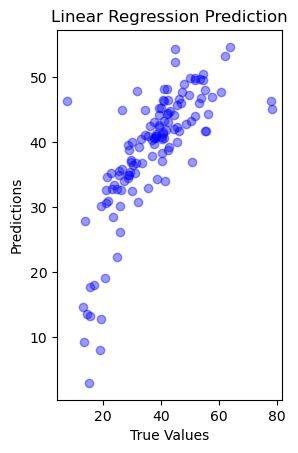

In [47]:
plt.Figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_predict, color='blue', alpha=0.4)

plt.title('Linear Regression Prediction')

plt.xlabel('True Values')
plt.ylabel('Predictions')

### Polynomial Regression Plot

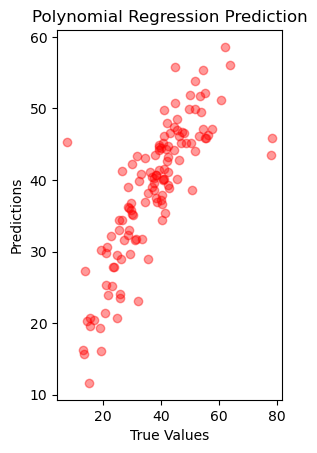

In [48]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_predict_poly, color='red', alpha=0.4)

plt.title('Polynomial Regression Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

### Curve Fitting for Polynomial Regression

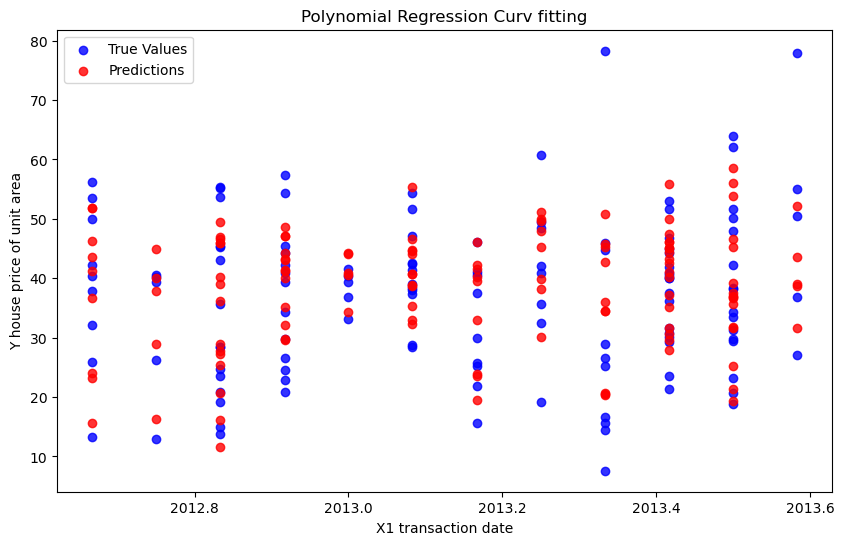

In [50]:
import numpy as np

sorted_indices = np.argsort(X_test.iloc[:, 0])
X_sorted = X_test.iloc[sorted_indices]
y_poly_sorted = y_predict_poly[sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(X_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', alpha=0.8, label='True Values')

plt.scatter(X_sorted.iloc[:, 0], y_poly_sorted, color='red', alpha=0.8, label='Predictions')

plt.title('Polynomial Regression Curv fitting')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()